# House Prices Dataset, Data Preparation and Machine Learning Models

Predict sales prices and practice feature engineering, RFs, and gradient boosting

The dataset can be download on kaggle website https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data and the description of the files in the Data set highlighted below

# Data Description File 

- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the - - column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms.

The description of the columns and features in the dataset, can be found in the dataset zip folder named "data_description.txt". You can also convert the data description into excel format to make it more ease to view

In order to make sales prices prediction from the dataset, the following steps will be taken into consideration:

- Acquire the data
- Explore the data
- Engineer and transform the features and the target variable
- Build a model
- Make predictions

# Step 1: Acquire the data and create our environment
The dataset should be download and put in the same folder where the jupyter notebook will be. The dataset already divided into train and test data, so we have a file named "train.csv" and the second file named "test.csv". We will first look at the train.csv data and after the model have been trained, we will make predictions using the test.csv dataset.

We will import pandas library and numpy library and any other useful python library. Then we will use Pandas to read the csv files using pd.read_csv() method to create a DataFrame from a csv file.
We can use Pandas to read in csv files. The pd.read_csv() method creates a DataFrame from a csv file.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use(style='ggplot')   # ggplot allows plotting and visualization

%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6)



In [2]:
# importing both train and test dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [3]:
# let check the size or dimension of the dataset

print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


It can be deduced that the "test.csv" file has only 80 columns and the "train.csv" file has 81 columns, the reason behind this is that "test.csv" data don't include the final "Sale Price" information. 

Now, We will look at the few rows using the DataFrame.head() method.

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

At this moment, we need download the data_decription and can be found here, the data_decription will assist us to understand the columns in the dataset and we will be able to identify the "Target variable or Target Column".

Based on the dataset, we are to predict the final sale price of each home. We can think about what we know about "house Pricing" and what we might expect to see in the dataset.

If we check the dataset and the data_decription, we will see features that we expected to see like YrSold (the year the home was last sold), and SalePrice (the property’s sale price in dollars). Others we might not be anticipated such as Landslope (the slope of the land the home is built upon) and RoofMat1 (the materials used to construct the roof). We have to decide and make decision on ways to approach these and other features. 

The "SalePrice" (the property’s sale price in dollars) and this is the target variable that you’re trying to predict.

In [5]:
# Perform Exploratory Data Analysis in just one line of code

import pandas_profiling  #- no module error
from pandas_profiling import ProfileReport

pandas_profiling.ProfileReport(pd.read_csv('train.csv'))

In [6]:
# To have an overall description of the train.csv dataset
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Step 2: Exploratory Data Analysis (EDA) - 
During the EDA stage, we will do some plotting using Matplotlib library for data visualization. This will allow us to visualize the distribution of the dataset, check for outiers and see other patterns that is easy to miss as well. 
# Explore the data and engineer Features
Since we are to predict the final sale price of the homes, the information is stored in the SalePrice column of the dataset. The value we are trying to predict is often called the "Target Variable". We need to get the description of the target variable using "Series.describe()" to get the information.

In [7]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


The "Series.describe()", that is 'describe()' function in python provides information about any series. while the "count" displays the total number of rows in the series. For numerical values in dataset, Series.describe () gives the (Mean, Std, Min, Max values) as well. Based on the information provided above, the average sale price of a house in the dataset is close to $1800,000, with most of the values falling within the $130,000 to $215,000 range.

# Log -Transfrom the Target Variable.

When performing regression, in most cases it makes sense to log-transform the target variable when it is skewed. The reason for performing log-transform is to improve the "linearity of the dataset". More information on log-transformation when performing regression modeling can be found here - https://en.wikipedia.org/wiki/Data_transformation_%28statistics%29

SInce the predictions that will be generated by the final model will be log-transformed, therefore, the will be need to convert the predictions back to their original form later in the tutorial. np.log() will be used to transform the variable and np.exp() will be used to reversed the transformation. 

# Performing Skewness for distribution of values
plt.hist() in python will be used to plot histogram of "SalePrice". If the distribution has a longer tail on the right. The distribution is positively skewed because mass of the distribution is concentrated on the left, while when the distribution has a longer tail on the left and the mass of the distribution is concentrated on the right of the figure, then the distribution is negatively skewed. The skewness will measure the shape of the distribution of the values.

Skew is: 1.8828757597682129


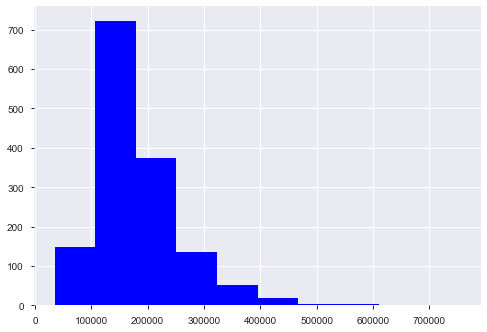

In [8]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

Because we are performing regression model,  we need to transform the the "SalePrice" distribution. We will use np.log() to transform train.SalePrice and then calculate the skewness the second time and re-plot the data distribution.

Skew is: 0.12174203145727748


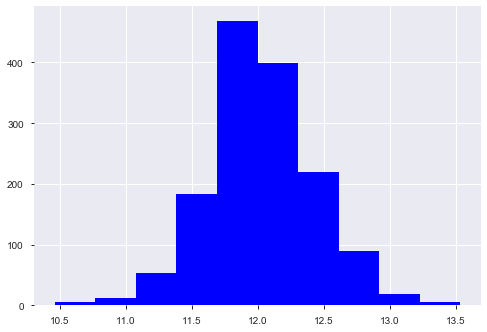

In [26]:
target_feature = np.log(train.SalePrice)
print ("Skew is:", target_feature.skew())
plt.hist(target_feature, color='blue')
plt.show()

The skew value is closer to 0, this implies that we have improved the skewness of the data. The data will visually resemble a normal distribution

The target variable has been transformed, We need to consider the other features/variables/columns. We will first check out the numerica features i.e. columns that contains numeric values. Then we will make some plot and data visualization. 

We will use the ".select_dtypes() method or functions to return a subset of columns matching the specified data dtypes.
# Working with Numeric Features or Columns

# Describe the numerical features

In [27]:
train.describe().transpose()   
# Note: The transpose of a matrix is obtained by moving the rows data to the column and columns data to the rows

,count,mean,std,min,25%,50%,75%,max
Id,1455.0,729.601375,421.782303,1.0,364.5,729.0,1094.5,1460.0
MSSubClass,1455.0,56.872852,42.201060,20.0,20.0,50.0,70.0,190.0
LotFrontage,1197.0,69.745196,23.193156,21.0,59.0,69.0,80.0,313.0
LotArea,1455.0,10455.472165,9880.273055,1300.0,7537.5,9464.0,11568.5,215245.0
OverallQual,1455.0,6.096220,1.373389,1.0,5.0,6.0,7.0,10.0
OverallCond,1455.0,5.578694,1.112867,1.0,5.0,5.0,6.0,9.0
YearBuilt,1455.0,1971.224742,30.193365,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1455.0,1984.848110,20.631492,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1447.0,102.615066,179.381349,0.0,0.0,0.0,164.5,1600.0
BsmtFinSF1,1455.0,439.364261,434.191781,0.0,0.0,383.0,710.0,2260.0


In [28]:
numeric_features = train.select_dtypes(include=[np.number]) # include in this code means only include numerical columns in data
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

The DataFrame.corr() function will be used to display the correlation (or relationship) between the columns. This will allow us to examine the correlations between the features and the target variable.

In [29]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.792879
GrLivArea      0.725145
TotalBsmtSF    0.644318
GarageCars     0.644097
Name: SalePrice, dtype: float64 

YrSold          -0.029754
OverallCond     -0.078465
MSSubClass      -0.082984
EnclosedPorch   -0.128565
KitchenAbvGr    -0.136082
Name: SalePrice, dtype: float64


The correlation results show that the first five features are the most "positively correlated" with the SalePrice, while the next five are the most "negatively correlated". 

We will examine the "OverallQual" feature more deeper using ".unique()" method to get the unique values in the column. The "OverallQual" column contains - the overall material and finish quality of the house.

In [30]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

As shown above, the "OverallQual" column of the data are "integer" values in the interval 1 to 10 inclusive.

# Using "Pivot Table" to Further Investigate  

While pivot() provides general purpose pivoting with various data types (strings, numerics, etc.), pandas also provides pivot_table() for pivoting with aggregation of numeric data. The function pivot_table() can be used to create spreadsheet-style pivot tables

To further investigate the relationship between the "OverallQual" and "SalePrice" using the "Pivot Table" method in pandas. To further read on the pivot table and how to achieve this task can be found in Pandas docs - https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html. We will set (index='OverallQual' and Values = 'SalePrice'. Here, we will chose to look at the median.

In [31]:
# investigating the relationship between "OverallQual" and "SalePrice". This is Bivariate Analysis/relationship
OverallQual_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

In [32]:
OverallQual_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,87500
4,108000
5,133000
6,160000
7,200141
8,270000
9,345000


To help us visualize this pivot table more easily, we can create a bar plot using the Series.plot() method.

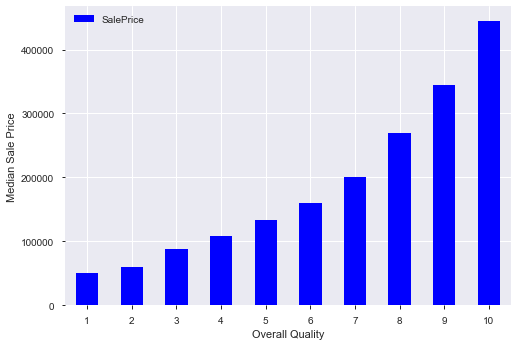

In [33]:
OverallQual_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

The visualization of Pivot Table above, that is, the relationship between the OverallQual and SalePrice, shows that the median "sales price" strictly increases as "Overall Quality increases".

# Boxplot: SalePrice vs. OverallQual

In [34]:
import chart_studio.plotly as py
import chart_studio
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

trace = []
for name, group in train[["SalePrice", "OverallQual"]].groupby("OverallQual"):
    trace.append( go.Box( y=group["SalePrice"].values, name=name ) )
    
layout = go.Layout(title="OverallQual", 
                   xaxis=dict(title='OverallQual',ticklen=5, zeroline= False),
                   yaxis=dict(title='SalePrice', side='left'),
                   autosize=False, width=750, height=500)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

As can be expected from the large correlation coefficient of 0.796 , there is an almost perfect linear increase of SalePrice with the OverallQual. We notice that this feature is in fact categorical (ordinal), only the discrete values 1,2..10 occur.


# Using Scatter Plots to Visualized Relationship between GrLiveArea and SalePrice
We will now use plt.scatter() to generate some scatter plots and to visualize the relationship between the "Ground Living Area (GrLivArea)" and "SalePrice".

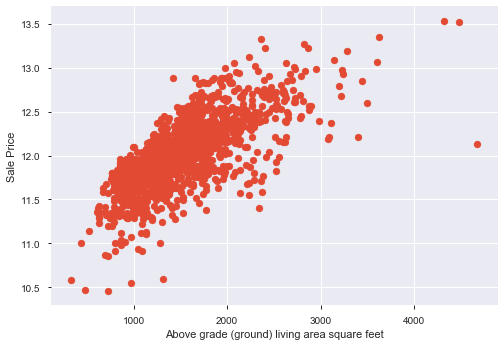

In [35]:
plt.scatter(x=train['GrLivArea'], y=target_feature)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

One can deduce that increases in living area correspond to increases in price.

# # Using Scatter Plots to Visualized Relationship between GarageArea and SalePrice

We will now use plt.scatter() to generate some scatter plots and to visualize the relationship between the "GarageArea" and "SalePrice".

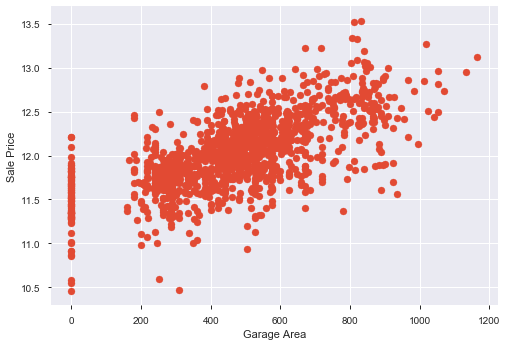

In [36]:
plt.scatter(x=train['GarageArea'], y=target_feature)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

The scatter plot above shows that there are many homes with "0" values for Garage Area which implies that many homes dont have garage. We will transform other features later to refelct this assumption. 

Also, there are few outliers. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So, these observations will be removed from the data and there are many techniques for removing or dealing with outliers in the dataset. 

Let create a new DataFrame with some outliers removed.

In [37]:
train = train[train['GarageArea'] < 1200] # Removing the outliers by indicating that any value higher 1200 be removed


Let plot scatter plot again to visualize the "GarageArea" column and see if the outliers have been corrected or removed

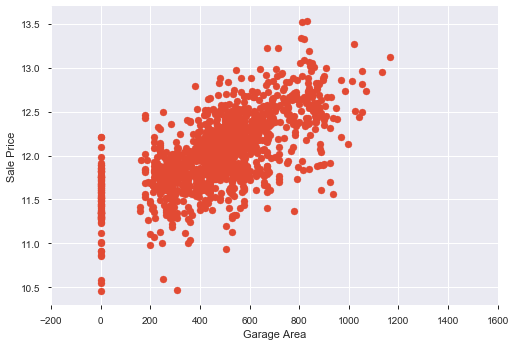

In [38]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))

# The xlim() function in pyplot module of matplotlib library is used to get or set the x-limits of the current axes

plt.xlim(-200,1600) # This forces the same scale as before

plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()




We can see that the outlier on the right side of the figure above have been removed when compare it to the previous scatter plot

# Using Scatter Plots to Visualized Relationship between GarageCars and SalePrice
We will now use plt.scatter() to generate some scatter plots and to visualize the relationship between the "GarageCars" and "SalePrice".

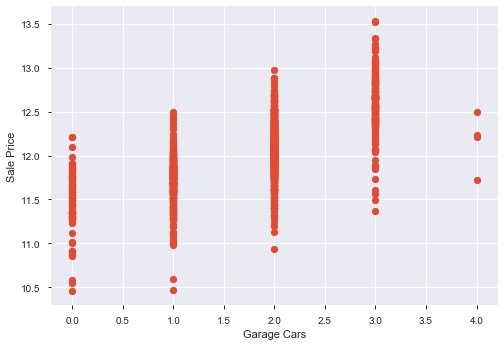

In [39]:
plt.scatter(x=train['GarageCars'], y=target_feature)
plt.ylabel('Sale Price')
plt.xlabel('Garage Cars')
plt.show()

The figure above shows that there is no different in the Sale Price based on the Garage Cars i.e. the size of garage in car capacity. It shows there is an overlap, garage size for 2.0 and 3.0 increases a little when Sale Price goes from 12.5 to 13.0.

Size of garage in car capacity

# Handling Missing Values or Null Values

We will need to examine the missing or null values in the dataset. We will create a DataFrame to view the top null columns. We will chain together using "train.isnull().sum() methods or functions which will return a series of counts of the null values in each column.

In [40]:
# To create a DataFrame to view the top null columns, and the [ : 25] indicate the number of features or columns to display
# The number indicated can also be increased if there is a need to increase the number features or columns to display.
Nulls_Values = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
Nulls_Values.columns = ['Null Count']
Nulls_Values.index.name = 'Feature'
Nulls_Values

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


To learn more on ways to handle missing Values - check this documentation https://www.kaggle.com/dejavu23/house-prices-plotly-pipelines-and-ensembles

PoolQC refers to as "Pool Quality" and Pool Quality is NaN when Pool Area is 0, or there is no pool. Some similar relationship can be found between Sale Price and many of the Garage-related columns as well.

# Another Method to Visualize Missing Value using Bar Chart

In [41]:
# plotly

import chart_studio.plotly as py
import chart_studio
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

train_null = pd.DataFrame()
train_null['missing'] = train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=False)

trace1 = go.Bar(x = train_null.index, 
                y = train_null['missing'],
                name="df_train", 
                text = train_null.index)

data = [trace1]

layout = dict(title = "NaN in train csv dataset", 
              xaxis=dict(ticklen=10, zeroline= False),
              yaxis=dict(title = "number of rows", side='left', ticklen=10,),                                  
              legend=dict(orientation="v", x=1.05, y=1.0),
              autosize=False, width=750, height=500,
              barmode='stack'
              )

fig = dict(data = data, layout = layout)
iplot(fig)

From the bar chart above, it shows the numerical futures with missing value or Nan/Null Values. PoolQC which is the Pool Quality has very much missing values follow by MiscFeature, Alley, Fence, LotFrontage and so on.


Let’s take a look at one of the other columns, MiscFeature. We’ll use the Series.unique() method to return a list of the unique values.

In [42]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


The data_description file in txt, shows us what the value above indicate as highlighted below

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
These values describe whether or not the house has a shed over 100 sqft, a second garage, and so on. We might want to use this information later. It’s important to gather domain knowledge in order to make the best decisions when dealing with missing data.

# Data Wrangling of the Non-numeric Features [Categorical Features]

In [43]:
categorical_features = train.select_dtypes(exclude=[np.number])    # exclude in this code means dont include numerical columns in data
categorical_features.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1447,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,766,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,863,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,377,867,605,1306,1321,1335,2,157,48,1266,1196


Based on what shown in the description of categorical features above, the following means:
- The Count column: indicates the count of non-null observations
- Unique column: counts the number of unique values
- top column: indicates the most commonly occurring value
- Freq column: shows the frequency of the top value
# Information on One-Hot Encoding 
For many of these features, we might want to use one-hot encoding to make use of the information for modeling.
One-hot encoding is a technique which will transform categorical data into numbers so the model can understand whether or not a particular observation falls into one category or another.

# Transforming and engineering features
When transforming features, it’s important to remember that any transformations that you’ve applied to the training data before fitting the model must be applied to the test data.

Our model expects that the shape of the features from the train set match those from the test set. This means that any feature engineering that occurred while working on the train data should be applied again on the test set.

To demonstrate how this works, let consider the "Street" column in the dataset, and from the data decription, "street" feature implies whether there is Gravel or Paved road access to the property.

In [44]:
print ("Original: \n")    # this implies make heading "original" and "\n" mean create a new line
print (train.Street.value_counts(), "\n")   # print the unique value in "street" and count it. 

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



The unique value in "Street" column are Pave and Grvl, which describe the type of road access to the property. The training dataset have only 5 homes with gravel access, and 1450 homes with Pave access. The model needs numerical data, so we will use "one-hot encoding" to transform the data into a Boolean column i.e. 0 or 1.

The pd.get_dummies() method will help us to handle one-hot encoding of the dataset to "enc_street". And this has to be done on both the train and test dataset. 

In [45]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [46]:
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


# Feature Engineering

Future Engineering is the process of making features of the data suitable for use in the machine learning and modelling. When we encoded the "street" column into a Boolean Values, We engineered a feature.

We need to engineering another feature. We will look at "SaleCondition" column by constructing and plotting a "Pivot Table", as we did above for OverallQual.

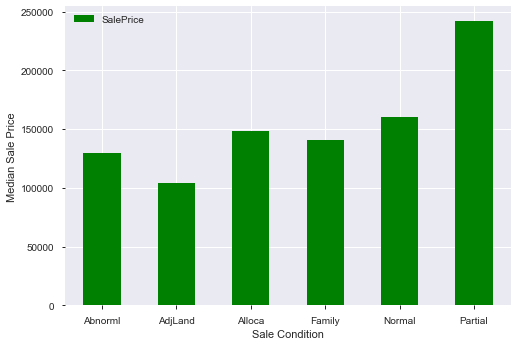

In [47]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='green')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0. We will use same method of one-hot encoding used for "street" column above.

In [48]:
def encode(x):
 return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

We will now explore the new fearure of Sale Condition Encoding as a plot using the code below. 

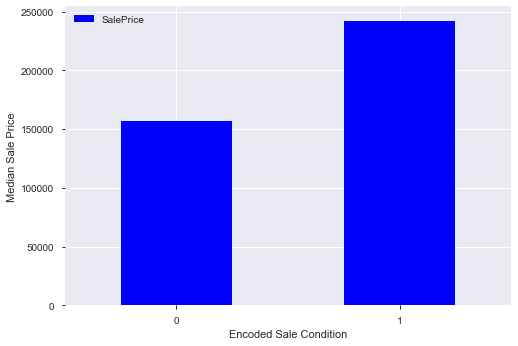

In [49]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

The above figure looks great, In order to improve the ultimate performance of the model, there is need to continue to work with more features/columns that will be useful for the modelling aspect and to transform them.

# Interpolate the Dataset - Another Ways to Handle Missing Values
Pandas dataframe.interpolate() function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value.

It is very important to deal with the missing data before preparing the data for modeling. The missing values will need to be filled with an average value and then assign the results to the data. The method is called "Interpolation" where we will used "DataFrame.interpolate()" method in python to make it more easier. This is the simple and quick ways of dealing with "missing values" and might not lead to the best performance of the model on the new data. Handling missing values is an important part of the modeling process and this is where creativity and insight comes in and make a big difference. You need to extend your practices in this area.

For further reading on Interpolation in Pandas DataFrame - https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

In [50]:
# This code will interpolate the missing value and drop them

data = train.select_dtypes(include=[np.number]).interpolate().dropna()


We can now check again if there is still missing number, i.e. if all of the columns have 0 null values.

In [51]:
sum(data.isnull().sum() != 0)

0

This implies that all the columns does not contain null values

# Step 3 : Build a linear model

Let’s perform the final steps to prepare our data for modeling. We’ll separate the features and the target variable for modeling. We will assign the features to X and the target variable to y. 

We use "np.log()" as explained above to transform the y variable. For the model, "data.drop([features], axis=1)" tells pandas which columns we want to exclude. We won’t include "SalePrice" for obvious reasons, and "Id" column is just an index with no relationship to SalePrice.

In [52]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

# Partitioning the Dataset - Split Dataset into Train and Test

The train_test_split() function from scikit-learn will be used to create a training set and a hold-out set. Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if "overfitting" has taken place. Making prediction on the test dataset "the unseen dataset by model" allows us to see if there is "Overfitting"

The train_test_split() returns four objects:

- X_train is the subset of our features used for training.
- X_test is the subset which will be our ‘hold-out’ set – This is what we will use to test the model.
- y_train is the target variable SalePrice which corresponds to X_train.
- y_test is the target variable SalePrice which corresponds to X_test.

The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set "random_state=42". This provides for reproducible results, since sci-kit learn’s "train_test_split" will randomly partition the data. 
The "test_size2 parameter tells the function what proportion of the data should be in the test partition. 

Here, about 33% of the data is devoted to the hold-out set i.e. test data

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
# dataset split into 33% test and 67% train

# Model Building

# Linear Regression
Linear Regression will first be created. At first, we instantiate the model
We will first create a Linear Regression model. First, we instantiate the model.

In [54]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

# Fitting the Model

The model need to be instantiate and fit. Model Fitting is referred to as a procedure that varies for different types of models. This means that we are estimating the relationship between our predictors and the target variable so we can make accurate predictions on new data.

The model will be fitted using X_train and y_train, and we will score with X_test and y_test. The "linear_reg.fit() method will fit the Linear regression model on the features and target variable that we pass.

In [59]:
model = linear_reg.fit(X_train, y_train)

# Make Prediction on the Test Dataset

- The model.predict() method will return a list of predictions given a set of predictors. 
- Use model.predict() after fitting the model.

In [61]:
predictions = model.predict(X_test)

# Evaluate the performance and visualize results

We need to evaluate the performance of the model. We will evaluate the model using "R-Square" and the "Root-Mean-Square-Error (RMSE)" will also be used later. The R-Square value is a measure of how close the data are to the fitted regression line and it takes a value between 0 and 1. 
- 1 meaning that all of the variance in the target variable is explained by the data 
- In general, a higher R-Square value means a better fit.
The "model.score()" method returns the r-squared value by default.

In [62]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8882477709262544


This means that our features explain approximately 89% of the variance in our target variable. We can learn more about R-Square abd RMSE.

We will also use Root-Mean-Square-Error to evaluate the model, the "mean_squared_error (MSE)" function takes two arrays and calculate the RMSE.

In [63]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519567713


Interpreting this value is somewhat more intuitive that the r-squared value. 

The RMSE measures the distance between the predicted values and actual values.

# Plotting the Relationship between the Actual and Predicted Value/Price using Scatter Plot

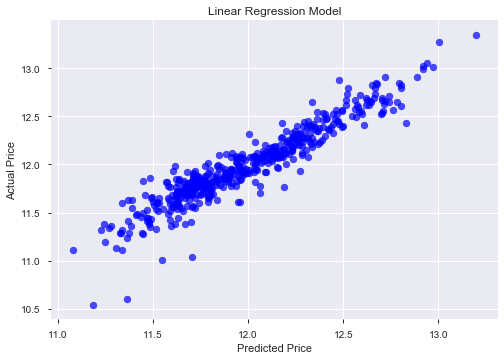

In [68]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7, color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

If our predicted values were identical to the actual values, this graph would be the straight line y=x because each predicted value x would be equal to each actual value y.

# Plotting the data frame for the actual and predicted value and plotting a graph for the same

In [67]:
train = pd.DataFrame({'Actual': y_test, 'Predicted':predictions})
train_1 = train.head(15)
train_1

,Actual,Predicted
497,12.122691,11.913904
1265,12.122147,12.049030
411,11.884489,11.773520
1048,11.652687,11.791838
1035,11.338572,11.269447
614,11.231888,11.362593
218,12.649155,12.336241
1185,11.560763,11.706926
1195,12.078239,12.020449
887,11.816727,11.892826


# To Check if the Model Predict Well using both "Actual" and "Predicted"

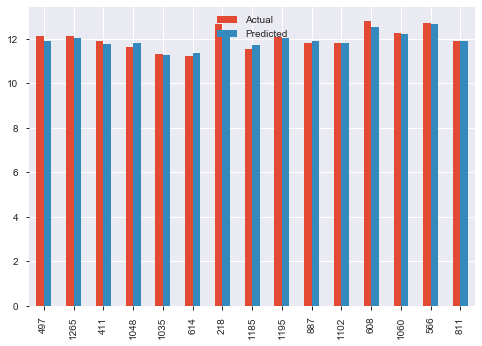

In [69]:
train_1.plot(kind = 'bar')

From the above graph, we can see that there is not much difference between the actual and predicted values, Hence our predicted model seems to work pretty well.

# Improve the Performance of the Model

We will use "Ridge Regularization" to decrease the influence of less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features. The model will be instantiated again. The Ridge Regularization model takes a parameter "alpha" which controls the strength of the regularization.

We’ll experiment by looping through a few different values of alpha, and see how this changes our results.

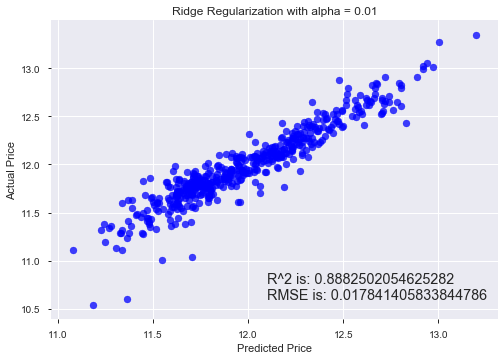

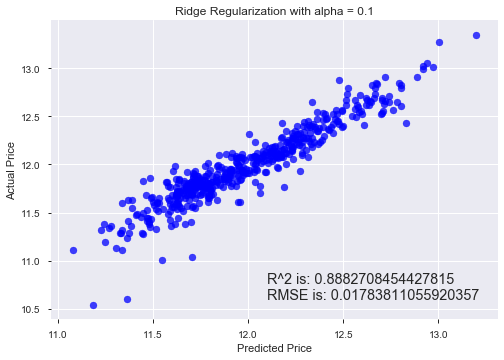

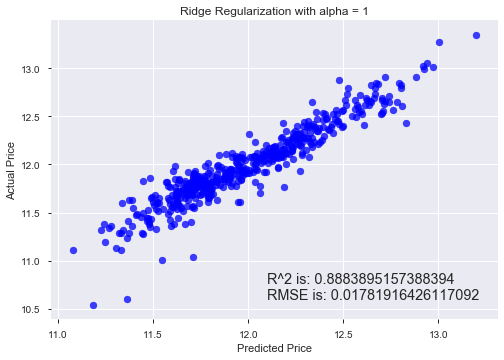

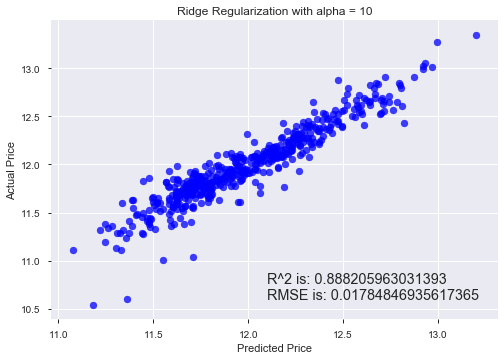

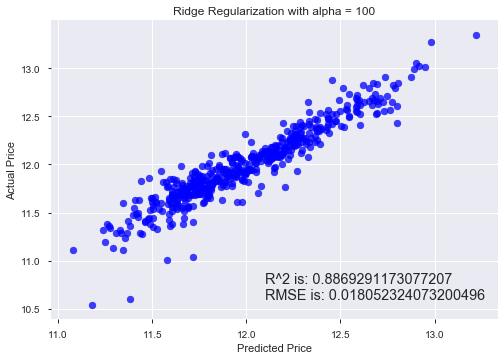

In [70]:
for i in range (-2, 3):
    alpha = 10**i
    R_model = linear_model.Ridge(alpha=alpha)
    ridge_model = R_model.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test, y_test),mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

These models perform almost identically to the first model. In our case, adjusting the alpha did not substantially improve our model. As you add more features, regularization can be helpful. Repeat this step after you’ve added more features.

Referencing - Adam Massachi  https://www.dataquest.io/blog/kaggle-getting-started/ originally created the tutorial. I used the tutorial practice and improve my data science skills, the tutorial was a little bit adjusted and some additional exploratory data analysis was included. 

Further reading or Tutorial using the same dataset - https://www.kaggle.com/dejavu23/house-prices-plotly-pipelines-and-ensembles